# Bank Authentication - Bank Note was Authentic or Not

## Table of Contents
1. [Problem Statement](#section1)</br>
2. [Data Loading, Exploration (Investigation) and Pre-Processing](#section2)</br>
    - 2.1 [Import Packages](#section201)</br>
    - 2.2 [Load data from CSV file](#section202)</br>
    - 2.3 [Data Profling](#section203)</br>
3. [Data Visualization](#section3)</br>
4. [Model Training and Prediction](#section4)</br>
    - 4.1 [Splitting X and y into training and test datasets](#section401)</br>        
    - 4.2 [Applying Neural Networks](#section402)</br>
        - 4.2.1 [Using Tanh Activation Function with Softmax at the output](#section4021)</br>
        - 4.2.2 [Output to CSV file](#section4022)</br>
        - 4.2.3 [Using RELU Activation Function](#section4023)</br>
        - 4.2.4 [Output to CSV file](#section4024)</br>
        - 4.2.5 [Using Tanh Activation Function with Dropouts](#section4025)</br>
        - 4.2.6 [Output to CSV file](#section4026)</br>
        - 4.2.7 [Using ELU Activation Function](#section4027)</br>
        - 4.2.8 [Output to CSV file](#section4028)</br>
        - 4.2.9 [Using Tanh Activation Function With Regularization](#section4029)</br>
        - 4.2.10 [Output to CSV file](#section40210)</br>
      
4. [Conclusion](#section5)</br>  

<a id=section1></a>
## 1. Problem Statement
Using the Bank Authentication Data Set from the UCI repository. Where class indicates whether or not a __Bank Note__ was authentic.

<a id=section2></a>
## 2. Data Loading, Exploration (Investigation) and Pre-Processing

__Data Set Information:__

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

- Given dataset has __4 related attributes of 1372 banking notes__
- Below is the column with their definitions

| Column Name          | Description                                                       |
| -------------        |--------------                                                     | 
| variance             | variance of Wavelet Transformed image (continuous)                | 
| skewness             | skewness of Wavelet Transformed image (continuous)                |  
| curtosis             | curtosis of Wavelet Transformed image (continuous)                | 
| entropy              | entropy of image (continuous)                                     | 
| class                | Class which provides information if bank note is authentic or not |

<a id=section201></a>
#### Import Packages  

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import warnings
import csv,os
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings('ignore')

Using TensorFlow backend.


<a id=section202></a>
#### Load data from CSV file 

In [4]:
# As header are not present, add the headers.
# Open the file in read mode and get the data
fileName = 'Dataset/data_banknote_authentication.txt'
with open(fileName, 'r') as original: data = original.read()
    
# 1. variance of Wavelet Transformed image (continuous)
# 2. skewness of Wavelet Transformed image (continuous)
# 3. curtosis of Wavelet Transformed image (continuous)
# 4. entropy of image (continuous)
# 5. class (integer)

# Add the header line to the file
with open(fileName, 'w') as modified:
    if 'variance_Wavelet_Transformed_image' not in data:
        modified.write("variance_Wavelet_Transformed_image,skewness_Wavelet_Transformed_image,curtosis_Wavelet_Transformed_image,entropy_image,class\n" + data)
    else:
        modified.write(data)

In [5]:
bn_data_df = pd.read_csv(fileName)
bn_data_df.head(10)

,variance_Wavelet_Transformed_image,skewness_Wavelet_Transformed_image,curtosis_Wavelet_Transformed_image,entropy_image,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
bn_data_df.shape

(1372, 5)

In [7]:
bn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance_Wavelet_Transformed_image    1372 non-null float64
skewness_Wavelet_Transformed_image    1372 non-null float64
curtosis_Wavelet_Transformed_image    1372 non-null float64
entropy_image                         1372 non-null float64
class                                 1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
#bn_data_df.describe()

<a id=section203></a>
#### Data Profling

In [9]:
# Dynamic Foldar creation
def createFoldar(foldar):
    directoryPath = os.getcwd()  
    if not os.path.exists(directoryPath+'/'+foldar):  
        os.mkdir(directoryPath+'/'+foldar)

In [10]:
createFoldar('Output')

In [11]:
profile = pandas_profiling.ProfileReport(bn_data_df)
profile.to_file("Output/bn_preprocessing.html")

- Profiling file will contains the overview of Datapoints and Varibales before Data Cleaning process. 
- It shows consolidate report about missing values, correlations and etc.. which helps to perfrom the data processing in     a better way.

##### Rename the feature names for human understandable

In [12]:
bn_data_df.columns=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'IsAuthentic']
bn_data_df.head(10)

,Variance,Skewness,Curtosis,Entropy,IsAuthentic
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


#### Heatmap for Missing Value

Text(0.5, 1, 'Heatmap for Missing Value')

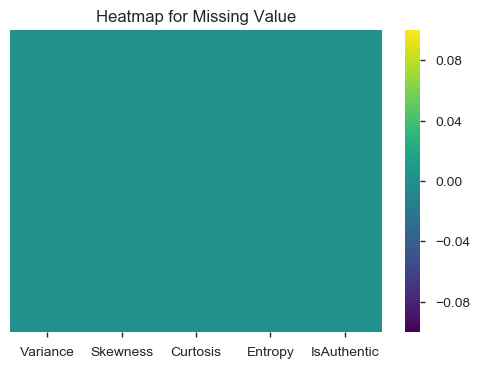

In [13]:
plt.figure(dpi=100)
sb.heatmap(bn_data_df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Heatmap for Missing Value')

In [14]:
bn_data_df.isnull().sum() 
bn_data_df = bn_data_df.dropna(axis=0)
print(bn_data_df.shape)

bn_data_df.index=range(0,len(bn_data_df),1)
bn_data_df.head()
print(bn_data_df.shape)

bn_data_df.head()

(1372, 5)
(1372, 5)


,Variance,Skewness,Curtosis,Entropy,IsAuthentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<a id=section3></a>
## 3. Data Visualization

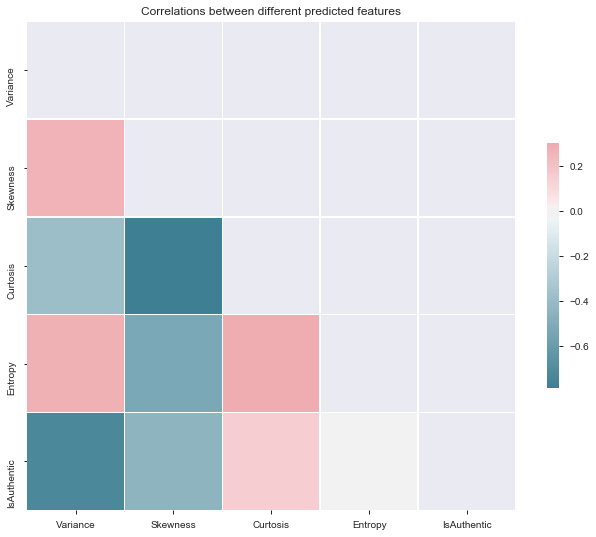

In [15]:
bn_data_df_corr = bn_data_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(bn_data_df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(bn_data_df_corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plt.title('Correlations between different predicted features')
plt.show()

#### Heat Map and Correlation of parameters

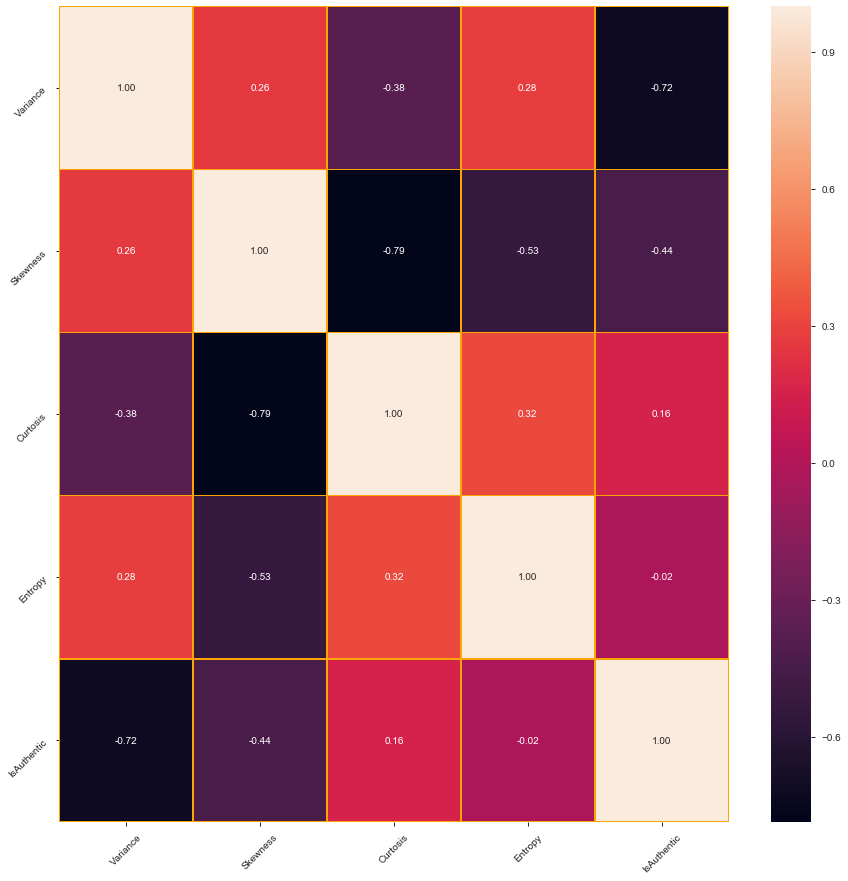

In [16]:
f,ax = plt.subplots(figsize=(15,15))
sb.heatmap(bn_data_df.corr(), annot = True, fmt = ".2f", ax = ax, linewidths = 0.5, linecolor = "orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Below Pairwise plots will provide the features that are having correlattion with target variable.

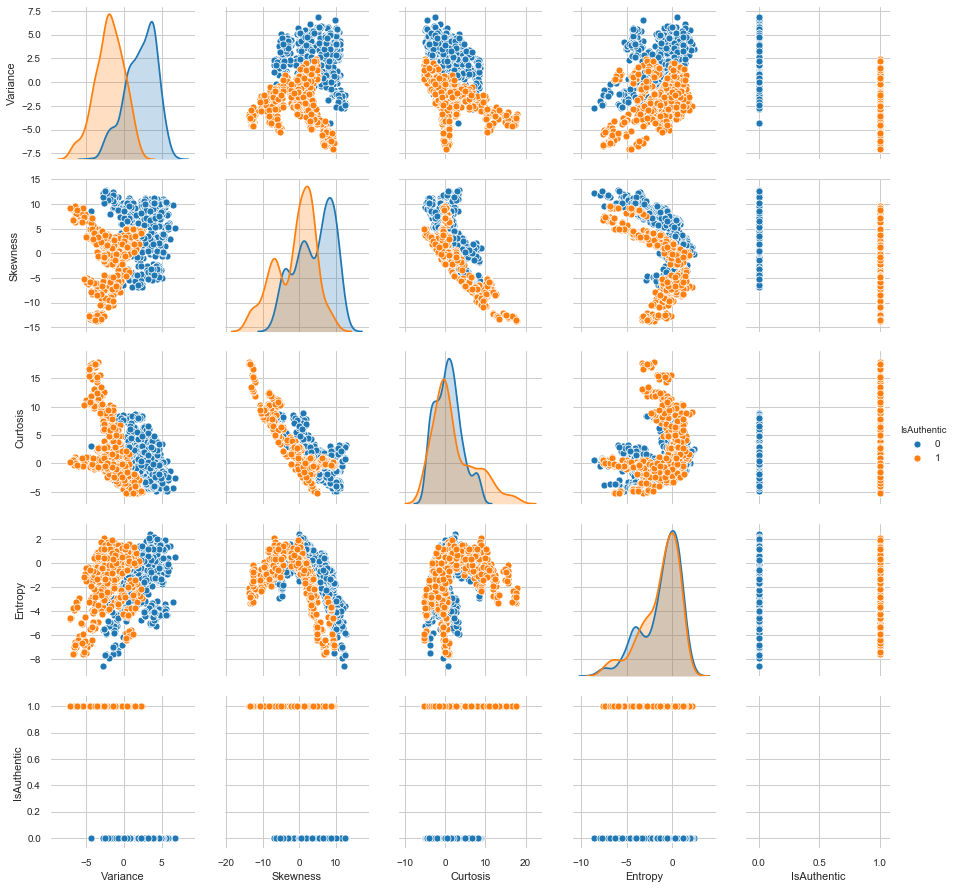

In [17]:
# Use pairplot and set the hue to be our class
sb.set_style("whitegrid")
sb.pairplot(bn_data_df, hue='IsAuthentic') 

# Show the plot
plt.show()



### Histograms

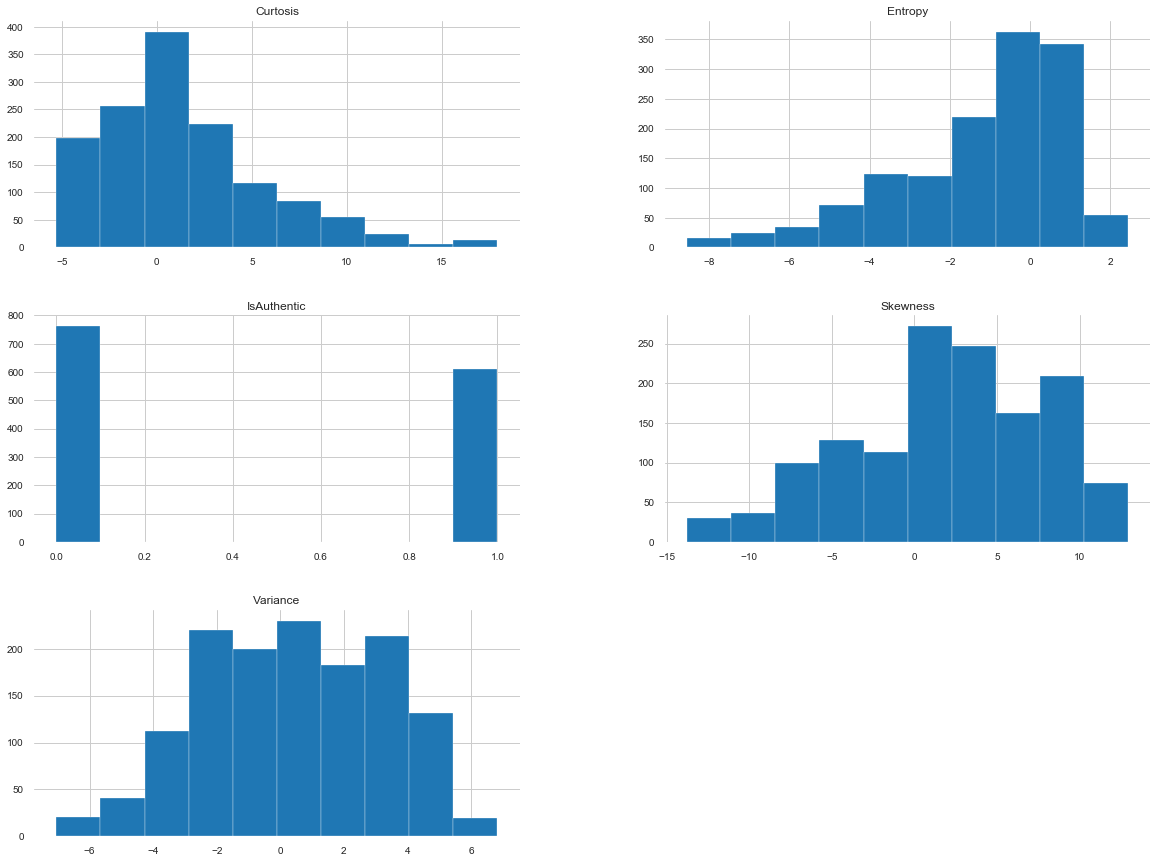

In [18]:
num_bins = 10
bn_data_df.hist(bins = num_bins, figsize = (20,15))
#plt.savefig("Dataset/loandata_histogram_plots")
plt.show()

### More Visualizations

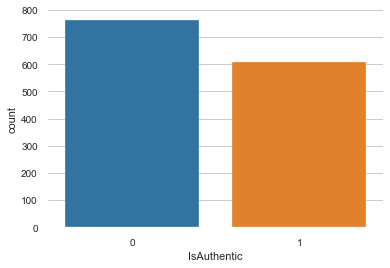

In [19]:
sb.countplot(bn_data_df['IsAuthentic']);

<b> Check the correlations among the features <b>

In [20]:
bn_data_df.corr()

,Variance,Skewness,Curtosis,Entropy,IsAuthentic
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
IsAuthentic,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<a id=section4></a>
### 4. Model Training and Prediction

In [21]:
bn_data_df.shape

(1372, 5)

 <a id=section401></a>
### 4.1 Splitting X and y into training and test datasets

In [22]:
X = bn_data_df.drop(columns = ['IsAuthentic'])
y = bn_data_df['IsAuthentic']

<a id=section402></a>
### 4.2 Applying Neural Network.

##### Fit Keras Model

Training occurs over epochs and each epoch is split into batches.

-__Epoch__: One pass through all of the rows in the training dataset.

-__Batch__: One or more samples considered by the model within an epoch before weights are updated.

__Generic Method to write output to file__

In [23]:

def writeOutput(filename,predictions):
    pred_len = len(predictions)
    rows = []
    for i in range(pred_len):
        row = str(y[i]) + ',' + str(predictions[i][0])
        rows.append([row])

    # field names    
    fields = ['Actual', 'Prediction']
    with open('Output/'+filename, 'w', newline='') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 

        # writing the fields 
        csvwriter.writerow(fields) 

        # writing the data rows 
        csvwriter.writerows(rows)

<a id=section4021></a>
### 4.2.1 Using Tanh Activation Function and Softmax 

In [24]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#### Applying Scalling

In [25]:
#Scaling
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Model Training and Prediction

In [26]:
# define the keras model
tanh_softmax_nn_model = Sequential()

tanh_softmax_nn_model.add(Dense(12, input_dim = 4, init='uniform', activation='tanh'))

#dropout for input layer
#tanh_softmax_nn_model.add(Dropout(0.2))
tanh_softmax_nn_model.add(Dense(6, activation='tanh'))

#dropout for hidden layer
#tanh_softmax_nn_model.add(Dropout(0.2))
tanh_softmax_nn_model.add(Dense(3, activation='tanh'))
tanh_softmax_nn_model.add(Dense(1, activation='softmax'))

__Complie Keras Model__

In [27]:
tanh_softmax_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
tanh_softmax_nn_model.fit(X_train, y_train, batch_size= 15, nb_epoch= 100)

Epoch 1/100
960/960 [==============================] - 1s 546us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 2/100
960/960 [==============================] - 0s 117us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 3/100
960/960 [==============================] - 0s 130us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 4/100
960/960 [==============================] - 0s 137us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 5/100
960/960 [==============================] - 0s 150us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 6/100
960/960 [==============================] - 0s 137us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 7/100
960/960 [==============================] - 0s 125us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 8/100
960/960 [==============================] - 0s 121us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 9/100
960/960 [==============================] - 0s 129us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 10/100
960/960 [==============================] - 0s 121us/step - l

960/960 [==============================] - 0s 121us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 80/100
960/960 [==============================] - 0s 108us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 81/100
960/960 [==============================] - 0s 107us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 82/100
960/960 [==============================] - 0s 110us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 83/100
960/960 [==============================] - 0s 107us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 84/100
960/960 [==============================] - 0s 105us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 85/100
960/960 [==============================] - 0s 108us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 86/100
960/960 [==============================] - 0s 108us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 87/100
960/960 [==============================] - 0s 112us/step - loss: 8.4652 - accuracy: 0.4479
Epoch 88/100
960/960 [==============================] - 0s 117us/step - loss:

In [29]:
#predict
softmax_y_pred= tanh_softmax_nn_model.predict(X_test)
rounded = [round(x[0]) for x in softmax_y_pred]
softmax_y_pred = tanh_softmax_nn_model.predict_classes(X_test)

print(softmax_y_pred)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [30]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, softmax_y_pred>0.5)
cm

array([[  0, 232],
       [  0, 180]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, softmax_y_pred.round())

print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 43.69


#### Classification Report

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, softmax_y_pred.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       0.44      1.00      0.61       180

    accuracy                           0.44       412
   macro avg       0.22      0.50      0.30       412
weighted avg       0.19      0.44      0.27       412



<a id=section4022></a>
#### 4.2.2 Output to CSV file
- output_tanhwithsoftmax .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [33]:
writeOutput('output_tanhwithsoftmax.csv', softmax_y_pred)

<a id=section4023></a>
### 4.2.3 Using RELU Activation Function

In [34]:
# define the keras model
relu_nn_model = Sequential()
relu_nn_model.add(Dense(12, input_dim = 4, activation='relu'))
relu_nn_model.add(Dense(4, activation='relu'))
relu_nn_model.add(Dense(1, activation='sigmoid'))

##### Compile Keras Model

In [35]:
relu_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
relu_nn_model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1372/1372 [==============================] - 0s 257us/step - loss: 0.7473 - accuracy: 0.5547
Epoch 2/150
1372/1372 [==============================] - 0s 148us/step - loss: 0.5189 - accuracy: 0.7048
Epoch 3/150
1372/1372 [==============================] - 0s 159us/step - loss: 0.4128 - accuracy: 0.8207
Epoch 4/150
1372/1372 [==============================] - 0s 160us/step - loss: 0.3132 - accuracy: 0.9191
Epoch 5/150
1372/1372 [==============================] - 0s 150us/step - loss: 0.2242 - accuracy: 0.9599
Epoch 6/150
1372/1372 [==============================] - 0s 150us/step - loss: 0.1734 - accuracy: 0.9738
Epoch 7/150
1372/1372 [==============================] - 0s 153us/step - loss: 0.1154 - accuracy: 0.9869
Epoch 8/150
1372/1372 [==============================] - 0s 155us/step - loss: 0.0530 - accuracy: 0.9964
Epoch 9/150
1372/1372 [==============================] - 0s 152us/step - loss: 0.0265 - accuracy: 1.0000
Epoch 10/150
1372/1372 [==============================]

1372/1372 [==============================] - 0s 146us/step - loss: 1.4505e-05 - accuracy: 1.0000
Epoch 77/150
1372/1372 [==============================] - 0s 146us/step - loss: 1.3830e-05 - accuracy: 1.0000
Epoch 78/150
1372/1372 [==============================] - 0s 143us/step - loss: 1.3309e-05 - accuracy: 1.0000
Epoch 79/150
1372/1372 [==============================] - 0s 147us/step - loss: 1.1758e-05 - accuracy: 1.0000
Epoch 80/150
1372/1372 [==============================] - 0s 142us/step - loss: 1.0855e-05 - accuracy: 1.0000
Epoch 81/150
1372/1372 [==============================] - 0s 138us/step - loss: 1.0033e-05 - accuracy: 1.0000
Epoch 82/150
1372/1372 [==============================] - 0s 140us/step - loss: 9.1279e-06 - accuracy: 1.0000
Epoch 83/150
1372/1372 [==============================] - 0s 147us/step - loss: 8.5290e-06 - accuracy: 1.0000
Epoch 84/150
1372/1372 [==============================] - 0s 148us/step - loss: 7.9561e-06 - accuracy: 1.0000
Epoch 85/150
1372/1372 

1372/1372 [==============================] - 0s 148us/step - loss: 5.9167e-08 - accuracy: 1.0000


##### Evaluate Keras Model

In [37]:
_, accuracy = relu_nn_model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy * 100))

1372/1372 [==============================] - 0s 35us/step
Accuracy: 100.00


##### Make Predictions

In [38]:
predictions = relu_nn_model.predict(X)

In [39]:
# round predictions 
rounded = [round(x[0]) for x in predictions]
# make class predictions with the model
predictions = relu_nn_model.predict_classes(X)

__Confusion Matrix__

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
cm_reluactivation = confusion_matrix(y, predictions>0.5)


In [41]:
cm_reluactivation

array([[762,   0],
       [  0, 610]], dtype=int64)

__Classification Report__

In [42]:
print(classification_report(y, predictions.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1372
   macro avg       1.00      1.00      1.00      1372
weighted avg       1.00      1.00      1.00      1372



<a id=section4024></a>
#### 4.2.4 Output to CSV file
- output_relu .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [43]:
createFoldar('Output')
writeOutput('output_relu.csv', predictions)

<a id=section4025></a>
### 4.2.5 Using Tanh Activation Function With Dropouts 

__Splitting Train and Test__

In [44]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


__Appying Scalling__

In [45]:
#Scaling
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

__Model Training and Prediction__

In [46]:
# define the keras model
tanh_nn_model = Sequential()

tanh_nn_model.add(Dense(12, input_dim = 4, init='uniform', activation='tanh'))

#dropout for input layer
tanh_nn_model.add(Dropout(0.2))
tanh_nn_model.add(Dense(6, activation='tanh'))

#dropout for hidden layer
tanh_nn_model.add(Dropout(0.2))
tanh_nn_model.add(Dense(3, activation='tanh'))
tanh_nn_model.add(Dense(1, activation='sigmoid'))

##### Compile Keras Model

In [47]:
tanh_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
tanh_nn_model.fit(X_train, y_train, batch_size= 15, nb_epoch= 100)

Epoch 1/100
960/960 [==============================] - 0s 388us/step - loss: 0.5874 - accuracy: 0.8156
Epoch 2/100
960/960 [==============================] - 0s 125us/step - loss: 0.4303 - accuracy: 0.9219
Epoch 3/100
960/960 [==============================] - 0s 133us/step - loss: 0.2726 - accuracy: 0.9635
Epoch 4/100
960/960 [==============================] - 0s 125us/step - loss: 0.1821 - accuracy: 0.9760
Epoch 5/100
960/960 [==============================] - 0s 133us/step - loss: 0.1360 - accuracy: 0.9781
Epoch 6/100
960/960 [==============================] - 1s 560us/step - loss: 0.1143 - accuracy: 0.9792
Epoch 7/100
960/960 [==============================] - 0s 154us/step - loss: 0.0953 - accuracy: 0.9823
Epoch 8/100
960/960 [==============================] - 0s 137us/step - loss: 0.0854 - accuracy: 0.9833
Epoch 9/100
960/960 [==============================] - 0s 142us/step - loss: 0.0764 - accuracy: 0.9885
Epoch 10/100
960/960 [==============================] - 0s 143us/step - l

960/960 [==============================] - 0s 121us/step - loss: 0.0263 - accuracy: 0.9906
Epoch 80/100
960/960 [==============================] - 0s 129us/step - loss: 0.0265 - accuracy: 0.9917
Epoch 81/100
960/960 [==============================] - 0s 129us/step - loss: 0.0229 - accuracy: 0.9927
Epoch 82/100
960/960 [==============================] - 0s 125us/step - loss: 0.0209 - accuracy: 0.9927
Epoch 83/100
960/960 [==============================] - 0s 133us/step - loss: 0.0267 - accuracy: 0.9906
Epoch 84/100
960/960 [==============================] - 1s 604us/step - loss: 0.0265 - accuracy: 0.9896
Epoch 85/100
960/960 [==============================] - 0s 150us/step - loss: 0.0276 - accuracy: 0.9896
Epoch 86/100
960/960 [==============================] - 0s 147us/step - loss: 0.0232 - accuracy: 0.9927
Epoch 87/100
960/960 [==============================] - 0s 108us/step - loss: 0.0247 - accuracy: 0.9906
Epoch 88/100
960/960 [==============================] - 0s 112us/step - loss:

In [49]:
#predict
y_pred= tanh_nn_model.predict(X_test)

In [50]:
rounded = [round(x[0]) for x in y_pred]

In [51]:
y_pred = tanh_nn_model.predict_classes(X_test)

In [52]:
print(y_pred)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


__Confusion Matrix__

In [53]:

from sklearn.metrics import confusion_matrix
cm_tanhactivation = confusion_matrix(y_test, y_pred>0.5)

In [54]:
cm_tanhactivation

array([[224,   8],
       [  0, 180]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred.round())

In [56]:
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 98.06


### Classification Report

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       232
           1       0.96      1.00      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



<a id=section4026></a>
#### 4.2.6 Output to CSV file
- output_tanh .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [58]:
writeOutput('output_tanh.csv', y_pred)

<a id=section4027></a>
### 4.2.7 Using ELU Activation Function

In [59]:
# define the keras model
elu_nn_model = Sequential()
elu_nn_model.add(Dense(16, input_dim = 4, activation='elu'))
elu_nn_model.add(Dense(12, activation='elu'))
elu_nn_model.add(Dense(8, activation='elu'))
elu_nn_model.add(Dense(4, activation='elu'))
elu_nn_model.add(Dense(1, activation='sigmoid'))

##### Compile Keras Model

In [60]:
elu_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Fit Keras Model

In [61]:
elu_nn_model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1372/1372 [==============================] - 0s 311us/step - loss: 0.4032 - accuracy: 0.8163
Epoch 2/150
1372/1372 [==============================] - 0s 180us/step - loss: 0.0994 - accuracy: 0.9876
Epoch 3/150
1372/1372 [==============================] - 1s 473us/step - loss: 0.0344 - accuracy: 1.0000
Epoch 4/150
1372/1372 [==============================] - 0s 182us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 5/150
1372/1372 [==============================] - 0s 186us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 6/150
1372/1372 [==============================] - 0s 173us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/150
1372/1372 [==============================] - 0s 177us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8/150
1372/1372 [==============================] - 0s 187us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/150
1372/1372 [==============================] - 0s 180us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/150
1372/1372 [==============================]

1372/1372 [==============================] - 0s 172us/step - loss: 1.0965e-06 - accuracy: 1.0000
Epoch 76/150
1372/1372 [==============================] - 0s 180us/step - loss: 1.0080e-06 - accuracy: 1.0000
Epoch 77/150
1372/1372 [==============================] - 0s 166us/step - loss: 9.3011e-07 - accuracy: 1.0000
Epoch 78/150
1372/1372 [==============================] - 0s 173us/step - loss: 8.6526e-07 - accuracy: 1.0000
Epoch 79/150
1372/1372 [==============================] - 0s 170us/step - loss: 7.8970e-07 - accuracy: 1.0000
Epoch 80/150
1372/1372 [==============================] - 0s 169us/step - loss: 7.3015e-07 - accuracy: 1.0000
Epoch 81/150
1372/1372 [==============================] - 1s 516us/step - loss: 6.7277e-07 - accuracy: 1.0000
Epoch 82/150
1372/1372 [==============================] - 0s 169us/step - loss: 6.2121e-07 - accuracy: 1.0000
Epoch 83/150
1372/1372 [==============================] - 0s 169us/step - loss: 5.7332e-07 - accuracy: 1.0000
Epoch 84/150
1372/1372 

1372/1372 [==============================] - 0s 164us/step - loss: 3.7541e-09 - accuracy: 1.0000
Epoch 150/150
1372/1372 [==============================] - 0s 164us/step - loss: 3.4953e-09 - accuracy: 1.0000


##### Evaluate Keras Model

In [62]:
_, accuracy = elu_nn_model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy * 100))

1372/1372 [==============================] - 0s 35us/step
Accuracy: 100.00


##### Make Predictions

In [63]:
elu_predictions = elu_nn_model.predict(X)

In [64]:
# round predictions 
elu_rounded = [round(x[0]) for x in elu_predictions]

In [65]:
# make class predictions with the model
elu_predictions = elu_nn_model.predict_classes(X)

__Confusion Matrix__

In [66]:
cm_eluactivation = confusion_matrix(y, elu_predictions > 0.5)

In [67]:
cm_eluactivation

array([[762,   0],
       [  0, 610]], dtype=int64)

__Classification Report__

In [68]:
print(classification_report(y, elu_predictions.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1372
   macro avg       1.00      1.00      1.00      1372
weighted avg       1.00      1.00      1.00      1372



<a id=section4028></a>
#### 4.2.8 Output to CSV file
- output_elu.csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [69]:
writeOutput('output_elu.csv', elu_predictions)

<a id=section4029></a>
### 4.2.9 Using Tanh Activation Function with Regularizations

__Splititng Train and Test__

In [70]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

__Appying Scalling__

In [71]:
#Scaling
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
from keras import regularizers

##### Compile Keras Model

In [73]:
# Add fully connected layer with a Tanh activation function with L2 as kernel_regularizer and L1 as activity_regularizer
tanhwithL2Regularization_nn_model = Sequential()
tanhwithL2Regularization_nn_model.add(Dense(12, input_dim = 4, init='uniform', activation='tanh'
                  ,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))

tanhwithL2Regularization_nn_model.add(Dense(6, activation='tanh',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

tanhwithL2Regularization_nn_model.add(Dense(3, activation='tanh',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

tanhwithL2Regularization_nn_model.add(Dense(1, activation='sigmoid'))
#tanhwithL2Regularization_nn_model.add(Dense(1, activation='softmax'))

##### Fit Keras Model

In [74]:
tanhwithL2Regularization_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Evaluate Keras Model

In [75]:
tanhwithL2Regularization_nn_model.fit(X_train, y_train, batch_size= 10, nb_epoch= 100)

Epoch 1/100
960/960 [==============================] - 1s 656us/step - loss: 0.8087 - accuracy: 0.8052
Epoch 2/100
960/960 [==============================] - 0s 177us/step - loss: 0.7342 - accuracy: 0.9219
Epoch 3/100
960/960 [==============================] - 0s 185us/step - loss: 0.6302 - accuracy: 0.9677
Epoch 4/100
960/960 [==============================] - 0s 245us/step - loss: 0.5545 - accuracy: 0.9823
Epoch 5/100
960/960 [==============================] - 1s 529us/step - loss: 0.5130 - accuracy: 0.9833
Epoch 6/100
960/960 [==============================] - 0s 175us/step - loss: 0.4842 - accuracy: 0.9823
Epoch 7/100
960/960 [==============================] - 0s 170us/step - loss: 0.4627 - accuracy: 0.9833
Epoch 8/100
960/960 [==============================] - 0s 178us/step - loss: 0.4476 - accuracy: 0.9771
Epoch 9/100
960/960 [==============================] - 0s 179us/step - loss: 0.4348 - accuracy: 0.9792
Epoch 10/100
960/960 [==============================] - 0s 176us/step - l

960/960 [==============================] - 0s 182us/step - loss: 0.2056 - accuracy: 0.9833
Epoch 80/100
960/960 [==============================] - 0s 168us/step - loss: 0.2045 - accuracy: 0.9823
Epoch 81/100
960/960 [==============================] - 0s 162us/step - loss: 0.2036 - accuracy: 0.9833
Epoch 82/100
960/960 [==============================] - 0s 156us/step - loss: 0.2019 - accuracy: 0.9812
Epoch 83/100
960/960 [==============================] - 0s 160us/step - loss: 0.2015 - accuracy: 0.9812
Epoch 84/100
960/960 [==============================] - 0s 154us/step - loss: 0.2004 - accuracy: 0.9823
Epoch 85/100
960/960 [==============================] - 0s 160us/step - loss: 0.1993 - accuracy: 0.9823
Epoch 86/100
960/960 [==============================] - 0s 164us/step - loss: 0.1988 - accuracy: 0.9833
Epoch 87/100
960/960 [==============================] - 0s 157us/step - loss: 0.1974 - accuracy: 0.9823
Epoch 88/100
960/960 [==============================] - 0s 156us/step - loss:

##### Make Predictions

In [76]:
#predict
tanhRegularization_tanh_pred= tanhwithL2Regularization_nn_model.predict(X_test)

rounded = [round(x[0]) for x in tanhRegularization_tanh_pred]

tanhRegularization_tanh_pred = tanhwithL2Regularization_nn_model.predict_classes(X_test)

print(tanhRegularization_tanh_pred)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


__Confusion Matrix__

In [77]:
from sklearn.metrics import confusion_matrix
cm_tanhwithRegularisation = confusion_matrix(y_test, tanhRegularization_tanh_pred>0.5)

In [78]:
cm_tanhwithRegularisation

array([[225,   7],
       [  0, 180]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, tanhRegularization_tanh_pred.round())

In [80]:
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 98.30


### Classification Report

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tanhRegularization_tanh_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       232
           1       0.96      1.00      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



<a id=section40210></a>
#### 4.2.10 Output to CSV file
- output_tanh_withRegularization.csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [82]:
writeOutput('output_tanh_withRegularization.csv', tanhRegularization_tanh_pred)

<a id=section5></a>
## 5. Conclusion & Inferences

1. Dataset (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) provided in the assignment is very small.
2. We learned about Neural Network. We delved into the details of various activation functions. 
3. We learned how neuron is characterized by its weight, bias with activation function. The input is fed to the input layer, the neurons perform a linear transformation on this input using the weights and biases.
4. We learned how activation function are important and understood that, a neural network without an activation function is essentially just a linear regression model.
5. For this assignment we explored 7 types of activation functions and choosed RELU, ELU, SOFTMAX, SIGMOID and TanH.
6. We have started with __tanh as activation for hidden layers and softmax for __outpur layer__ got __Accuracy: 43.69%__.
7. Then we tried different activation functions like __relu (hidden layers)+ sigmoid (output layer)__, __tanh (hidden layers)+ sigmoid (output layer)__, __elu (hidden layers)+ sigmoid (output layer)__, __tanh (hidden layers)+ sigmoid (output layer) + dropouts__, and __relu (hidden layers)+ sigmoid (output layer) + L1  L2 Rregularisation__ Methods. Got success in imporving the accuracy.
9. Below are few pros and cons which we found on activation functions along with brief explanations of them:
    - ELU: Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results.
        - Pros:
            - ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
            - ELU is a strong alternative to ReLU.
        - Cons:
            - For x > 0, it can blow up the activation with the output range of [0, inf].
    - ReLU: A recent invention which stands for Rectified Linear Units. The formula is deceptively simple: max(0,z).
        - Pros:
            - It avoids and rectifies vanishing gradient problem.
            - ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical 
              operations.
        - Cons:
            - One of its limitation is that it should only be used within Hidden layers of a Neural Network Model.
            - Some gradients can be fragile during training and can die. It can cause a weight update which will makes it 
              never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.
            - The range of ReLu is zero to infinity
    - TanH: It squashes a real-valued number to the range [-1, 1]. It’s non-linear.
        - Pros:
            - The gradient is stronger for tanh than sigmoid ( derivatives are steeper).
        - Cons:
            - It gives rise to a problem of vanishing gradient.
    - Sigmoid: It takes a real value as input and outputs another value between 0 and 1. 
        - Pros:
            - It is nonlinear in nature. Combinations of this function are also nonlinear.
            - It will give an analog activation unlike step function.
            - It has a smooth gradient too and a good for a classifier.
            - The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear 
              function. So we have our activations bound in a range. 
        - Cons:
            - Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
            - It gives rise to a problem of vanishing gradients.
            - Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output 
              < 1, and it makes optimization harder.
            - Sigmoids saturate and kill gradients.           
10. Regularization Techniques
    - We have used the dropout regularization technique to check if any overfitting problem and avoid the same.
        - Dropout Regularization
            - Used Dropout with Tanh (hidden layers) + Sigmoid (output layer) got the accuracy as 98.79%.
            - It is aviced to use  a larger network. You are likely to get better performance when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.
            - Constrain the size of network weights. A large learning rate can result in very large network weights.
        - l1 l2 regularization
            - Used l2 as kernel_regularizer , l1 as activity_regularizer with Tanh (hidden layers) + Sigmoid (output layer) got the accuracy as 98.30%. 
            - We combined L1 and L2 because the practical advantage is, L2 generally beats L1 in terms of accuracy and it is easier to adjust. On the other hand, L1 can deal with sparse feature spaces and helps doing feature selection. So, combining L2 and L1 we get both accuracy and sparsity.
        - As provided data points are only 1300+ we didnot get much difference in accuracy when applied Regularization techniques. 